# PyTorch Primer

In [15]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [7]:
device = torch.device("cpu")

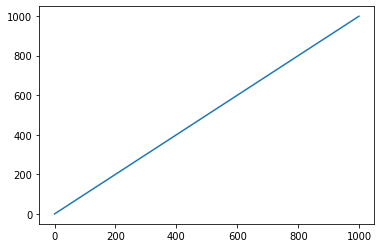

In [10]:
t = torch.linspace(0, 1000, 1000, dtype=int)
plt.plot(t)

## Loss Function

This will define how "good" (or bad) a solution is

In [11]:
def loss_fn(x1, x2):
    assert len(x1) == len(x2)
    return torch.linalg.norm(x2 - x1)

loss_fn(torch.tensor([1,2], dtype=float), torch.tensor([0,1], dtype=float)).detach().numpy()

array(1.41421356)

Loss= 0.1274278312921524
Loss= 0.07490461319684982
Loss= 0.02604527212679386
Loss= 0.0005679482710547745
Loss= 0.0005761790089309216
Loss= 0.0005841113743372262
Loss= 0.0005924341385252774
Loss= 0.0006017689593136311
Loss= 0.0006105461507104337
Loss= 0.0006202379008755088


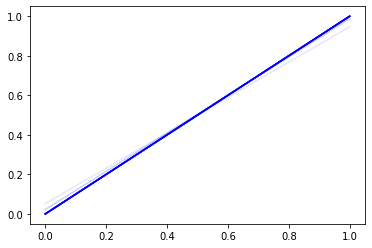

In [12]:
# Learn a NN to make a linear function ax + b

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Linear(2, 2)
)
x = torch.tensor([1.0,2.0])
lr = 0.0001
preds = []
y = torch.tensor([0,1], dtype=torch.float)

for i in range(1000):
    y_pred = model(x)
    loss = loss_fn(y, y_pred)
    
    if i % 100 == 0:
        print("Loss=",loss.item())
        preds.append(y_pred)
    
    model.zero_grad()
    loss.backward()
    
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad


for i,pred in enumerate(preds):
    plt.plot(pred.detach().numpy(), c=(0,0,1,i/len(preds)))
    
# plt.xlim(0,1)
# plt.ylim(0,1)


tensor([0., 1.]) tensor([0.7051, 0.0226], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.6244, 0.1038], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.5791, 0.1497], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.5378, 0.1917], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.4977, 0.2326], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.4582, 0.2732], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.4189, 0.3136], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.3798, 0.3540], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.3409, 0.3944], grad_fn=<AddBackward0>)
tensor([0., 1.]) tensor([0.3023, 0.4348], grad_fn=<AddBackward0>)


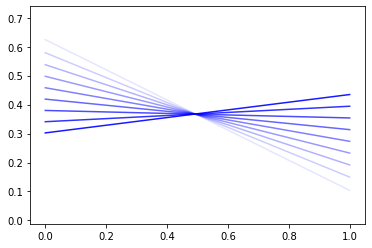

In [13]:


model = nn.Sequential(nn.Linear(2, 2))
x = torch.tensor([1.0,2.0])
lr = 0.0001
optim = torch.optim.RMSprop(model.parameters(), lr=lr) # This is new
preds = []
for i in range(1000):
    y = torch.tensor([0,1], dtype=torch.float)
    y_pred = model(x)

    
    if i % 100 == 0:
        print(y, y_pred)
        preds.append(y_pred)
    
    loss = loss_fn(y, y_pred)
    model.zero_grad()
    loss.backward()
    
    optim.step()


for i,pred in enumerate(preds):
    plt.plot(pred.detach().numpy(), c=(0,0,1,i/len(preds)))


In [14]:
# That is for a hard-coded linear function, but let's generate some linear data

from torch.utils.data import Dataset, DataLoader

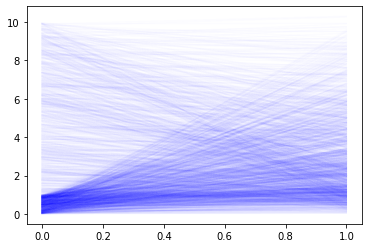

In [24]:
class LinearDataset(Dataset):
    
    def __init__(self, size, a_range, b_range):
        self.a_range = a_range
        self.b_range = b_range
        self.size = size
    
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        
        a = random.uniform(self.a_range[0], self.a_range[1])
        b = random.uniform(self.b_range[0], self.b_range[1])
        y = [random.random() * a + b, random.random() * a + b]
        return [a,b], y
    
ds = LinearDataset(1000, [0,10], [0,1])
for i in range(len(ds)):
#     print(ds[i])
    plt.plot(ds[i], c=[0,0,1,0.01])

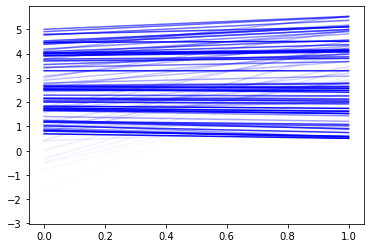

In [36]:
ds = LinearDataset(10000, [0,10], [0,1])

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.Linear(10, 2)
)
lr = 0.0001
optim = torch.optim.RMSprop(model.parameters(), lr=lr) # This is new
preds = []
for i in range(int(len(ds)*0.9)):
    x,y = ds[i]
    x = torch.tensor(x)
    y = torch.tensor(y)
    y_pred = model(x)
    if i % 100 == 0:
#         print(y, y_pred)
        preds.append(y_pred)
    
    loss = loss_fn(y, y_pred)
    model.zero_grad()
    loss.backward()
    
    optim.step()


for i,pred in enumerate(preds):
    plt.plot(pred.detach().numpy(), c=(0,0,1,i/len(preds)))



    
x = [0,1]
# y = 
# model()